In [1]:
# add default values for parameters here

In [2]:
# Parameters
upstream = {"filter_data": {"nb": "/Users/sinugp/my_ploomber_project/products/filter_data.ipynb", "data": "/Users/sinugp/my_ploomber_project/data/filtered_data.csv"}}
product = {"nb": "/Users/sinugp/my_ploomber_project/products/plot_line_chart.ipynb", "img": "/Users/sinugp/my_ploomber_project/data/line_chart.png"}


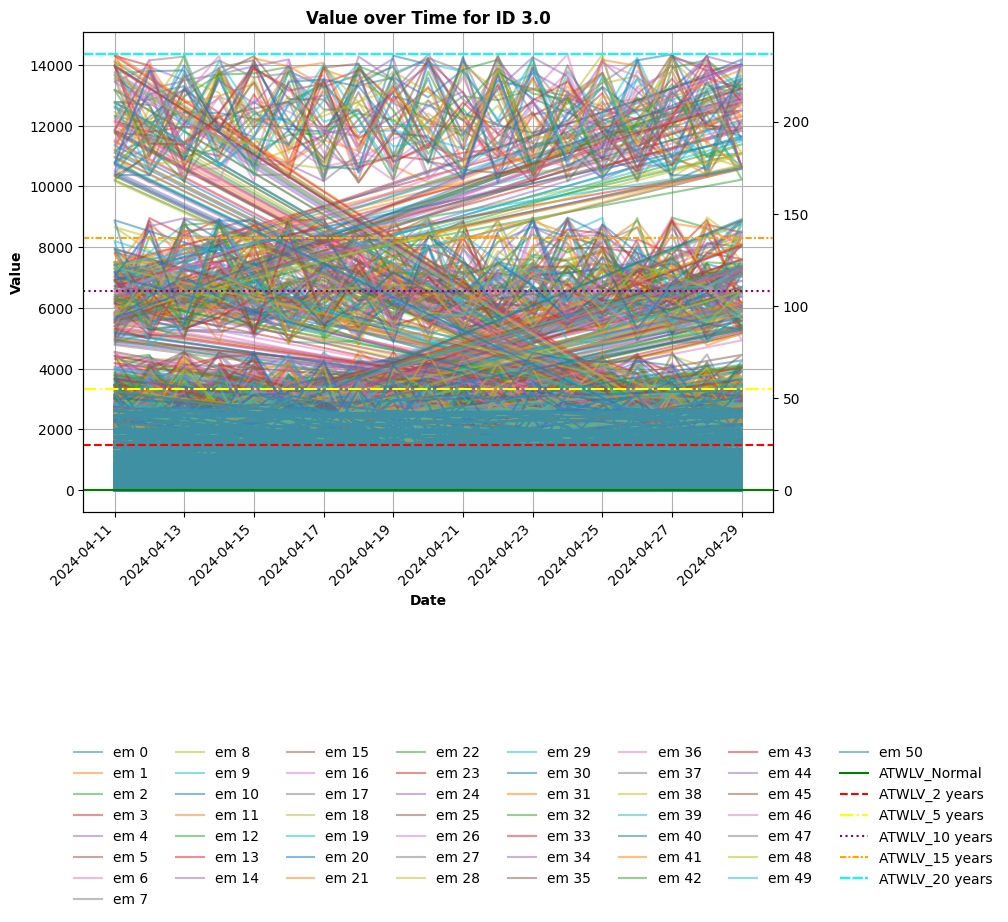

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def run(upstream, product):
    df = pd.read_csv(upstream['filter_data']['data'])
    id = df['Id'].iloc[0]  # Example: using the first ID

    # Ensure date is in datetime format
    df['date'] = pd.to_datetime(df['date'])

    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax2 = ax1.twinx()  # Instantiate a second y-axis that shares the same x-axis

    # Plot 51 lines for each ens_mem value with shortened legend labels
    for ens_mem in range(51):
        ens_mem_data = df[df['ens_mem'] == ens_mem]
        ax1.plot(ens_mem_data['date'], ens_mem_data['value'], linestyle='-', alpha=0.5, label=f'em {ens_mem}')

    ax1.set_xlabel('Date', fontweight='bold')
    ax1.set_ylabel('Value', fontweight='bold')
    ax1.set_title(f'Value over Time for ID {id}', fontweight='bold')
    ax1.grid(True)

    # Set major locator and formatter for x-axis
    ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

    plt.subplots_adjust(right=0.7, top=0.95, bottom=0.35)  # Adjust the top, right, and bottom of the graph

    # Add horizontal lines for ActiveThemeWarningLevelValues with different line styles and colors on secondary y-axis
    warning_levels = {
        'ActiveThemeWarningLevelValues_Normal Flow': ('-', 'green', 'ATWLV_Normal'),
        'ActiveThemeWarningLevelValues_2 years Return Period Flow': ('--', 'red', 'ATWLV_2 years'),
        'ActiveThemeWarningLevelValues_5 years Return Period Flow': ('-.', 'yellow', 'ATWLV_5 years'),
        'ActiveThemeWarningLevelValues_10 years Return Period Flow': (':', 'purple', 'ATWLV_10 years'),
        'ActiveThemeWarningLevelValues_15 years Return Period Flow': ((0, (3, 1, 1, 1)), 'orange', 'ATWLV_15 years'),
        'ActiveThemeWarningLevelValues_20 years Return Period Flow': ((0, (5, 1)), 'cyan', 'ATWLV_20 years')
    }

    for level, (linestyle, color, short_name) in warning_levels.items():
        if level in df.columns:
            value = df[level].unique()[0]
            ax2.axhline(y=value, color=color, linestyle=linestyle, label=short_name)

    # Adjust legend positioning to be horizontal at the bottom
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    combined_handles = handles1 + handles2
    combined_labels = labels1 + labels2

    # Ensure only unique labels are displayed
    unique_labels = {}
    for handle, label in zip(combined_handles, combined_labels):
        if label not in unique_labels:
            unique_labels[label] = handle

    fig.legend(unique_labels.values(), unique_labels.keys(), loc='lower center', ncol=8, bbox_to_anchor=(0.5, -0.15), borderaxespad=0., frameon=False)

    fig.savefig(product['img'])

if __name__ == "__main__":
    upstream = {
        'filter_data': {
            'data': 'data/filtered_data.csv'
        }
    }
    product = {
        'img': 'data/line_chart.png'
    }
    run(upstream, product)
